# 🏡 Home Insurance Claims SQL Project
In this project, I learned SQL by analyzing fictional home insurance data. This project simulates common tasks in data analysis and risk assessment to assist in learning SQL.

In [11]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('home_insurance_claims.db')

## 📋 Task 1: List All Tables

In [12]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
pd.read_sql_query(query, conn)

,name
0,Customers
1,Policies
2,Claims


## 🔍 Task 2: Preview the Data

In [13]:
pd.read_sql_query("SELECT * FROM Customers LIMIT 5;", conn)

,CustomerID,Name,Age,HomeValue,MaritalStatus,Occupation
0,1,Jordan Lee,40,344821,Single,Accountant
1,2,Casey White,50,441310,Married,Technician
2,3,Taylor Brown,36,757498,Married,Teacher
3,4,Alex Morgan,50,538474,Divorced,Engineer
4,5,Taylor Brown,60,596499,Divorced,Engineer


In [14]:
pd.read_sql_query("SELECT * FROM Policies LIMIT 5;", conn)

,PolicyID,CustomerID,PolicyStart,PolicyEnd,Premium,CoverageAmount,ZipCode
0,101,1,2024-05-29,2026-02-08,1919.42,400000,77005
1,102,2,2023-06-16,2026-01-22,1154.18,100000,77005
2,103,3,2024-08-22,2025-11-24,2980.65,400000,77005
3,104,4,2024-08-26,2025-12-08,1772.67,400000,90210
4,105,5,2024-06-09,2026-04-04,1939.28,200000,10001


In [15]:
pd.read_sql_query("SELECT * FROM Claims LIMIT 5;", conn)

,ClaimID,PolicyID,DateOfClaim,ClaimAmount,Cause,Status
0,1,102,2024-09-04,5461.09,Theft,Pending
1,2,102,2024-12-22,15118.18,Water Damage,Approved
2,3,104,2025-03-19,9156.05,Water Damage,Rejected
3,4,104,2024-08-11,3213.57,Water Damage,Approved
4,5,104,2025-05-02,13062.43,Fire,Pending


## 📊 Task 3: Count Total Claims Over $10,000 in the Last Year

In [16]:
query = '''
SELECT COUNT(*) AS HighValueClaims
FROM Claims
WHERE ClaimAmount > 10000 AND DateOfClaim >= date('now', '-1 year');
'''
pd.read_sql_query(query, conn)

,HighValueClaims
0,14


## 🔗 Task 4: Join Customers and Policies

In [17]:
query = '''
SELECT c.Name, c.Occupation, p.Premium, p.CoverageAmount
FROM Customers c
JOIN Policies p ON c.CustomerID = p.CustomerID;
'''
pd.read_sql_query(query, conn)

,Name,Occupation,Premium,CoverageAmount
0,Jordan Lee,Accountant,1919.42,400000
1,Casey White,Technician,1154.18,100000
2,Taylor Brown,Teacher,2980.65,400000
3,Alex Morgan,Engineer,1772.67,400000
4,Taylor Brown,Engineer,1939.28,200000
5,Sydney Gray,Teacher,1836.09,300000
6,Casey White,Technician,2221.18,300000
7,Casey White,Technician,1731.74,100000
8,Taylor Brown,Engineer,2797.97,300000
9,Casey White,Retired,2165.00,300000


## 🛡️ Task 5: Detect High Risk
List customers under 30 with more than 2 claims.

In [ ]:
query = '''
SELECT c.Name, COUNT(*) AS NumClaims
FROM Customers c
JOIN Policies p ON c.CustomerID = p.CustomerID
JOIN Claims cl ON p.PolicyID = cl.PolicyID
WHERE c.Age < 30
GROUP BY c.Name
HAVING COUNT(*) > 2;
'''
pd.read_sql_query(query, conn)

# Window Functions

This SQL query below uses a window function to calculate cumulative claim amounts for each customer over time. 

# Key Concepts:

PARTITION BY CustomerID
Resets the window function per customer

Without it, you’d get a single cumulative sum for the whole table

ORDER BY DateOfClaim
Ensures the cumulative sum is calculated chronologically

SUM(ClaimAmount) OVER (...)
Adds up claim amounts row-by-row within each customer partition

# Use Cases in Actuarial Work:

-Analyzing claim severity over time for a policyholder

-Evaluating cumulative losses in a triangle model

-Creating cash flow patterns for reserving

-Tracking incremental vs. cumulative loss development

In [24]:
query = '''SELECT
  PolicyID,
  DateOfClaim,
  ClaimAmount,
  SUM(ClaimAmount) OVER (
    PARTITION BY PolicyID
    ORDER BY DateOfClaim
  ) AS CumulativeClaims
FROM Claims; 
'''
pd.read_sql_query(query, conn)

,PolicyID,DateOfClaim,ClaimAmount,CumulativeClaims
0,102,2024-09-04,5461.09,5461.09
1,102,2024-12-22,15118.18,20579.27
2,104,2024-08-11,3213.57,3213.57
3,104,2025-03-19,9156.05,12369.62
4,104,2025-05-02,13062.43,25432.05
5,105,2024-03-23,3377.13,3377.13
6,105,2024-10-16,3892.05,7269.18
7,105,2025-03-11,23035.02,30304.20
8,106,2024-06-28,7015.34,7015.34
9,106,2024-07-02,22214.12,29229.46


# Time Series Analysis

These lines of code below extract the year and month from DateOfClaim, turning daily dates into monthly periods by renaming them as ClaimMonth. It then calculates the total claims for each month using SUM(ClaimAmount), adding up all claims filed in the same ClaimMonth. The GROUP BY ClaimMonth groups all rows that fall in the same ClaimMonth, which ultimately makes the aggregation by month work. 

# Actuarial Use Cases:

- Claim trend analysis over time
- Building month reserving reports
- Detecting seasonal claim patterns
- Visualizing changes in claim frequency/severity over months

In [27]:
query = '''
SELECT strftime('%Y-%m', DateOfClaim) AS ClaimMonth, SUM(ClaimAmount)
FROM Claims
GROUP BY ClaimMonth;
'''
pd.read_sql_query(query, conn)

,ClaimMonth,SUM(ClaimAmount)
0,2024-03,38393.33
1,2024-04,1284.39
2,2024-05,49728.04
3,2024-06,21321.80
4,2024-07,36177.35
5,2024-08,3213.57
6,2024-09,55121.07
7,2024-10,35058.24
8,2024-11,18396.15
9,2024-12,47347.77


# Visualizations

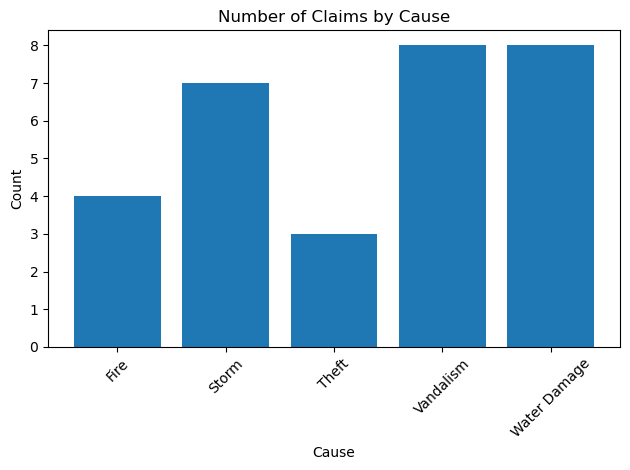

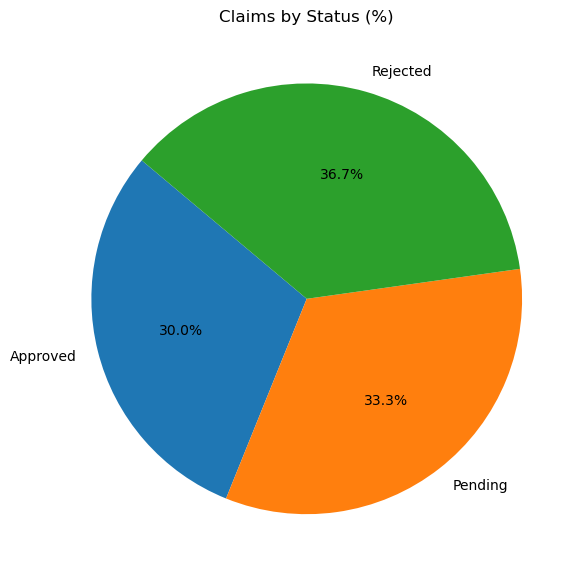

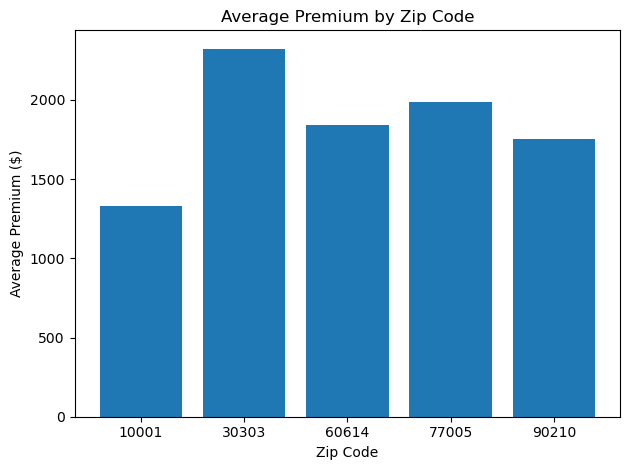

In [31]:
import matplotlib.pyplot as plt

# Claims by Cause
claims_by_cause = pd.read_sql_query("""
SELECT Cause, COUNT(*) AS NumClaims
FROM Claims
GROUP BY Cause;
""", conn)

plt.bar(claims_by_cause["Cause"], claims_by_cause["NumClaims"])
plt.title("Number of Claims by Cause")
plt.xlabel("Cause")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Claims by Status - Pie Chart
claims_by_status = pd.read_sql_query("""
SELECT Status, COUNT(*) AS NumClaims
FROM Claims
GROUP BY Status;
""", conn)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    claims_by_status["NumClaims"],
    labels=claims_by_status["Status"],
    autopct='%1.1f%%',     # Show percentages
    startangle=140         # Rotate for better layout
)
plt.title("Claims by Status (%)")
plt.tight_layout()
plt.show()

# Average Premiums by Zip Code
avg_premiums_by_zip = pd.read_sql_query("""
SELECT ZipCode, AVG(Premium) AS AvgPremium
FROM Policies
GROUP BY ZipCode;
""", conn)

plt.bar(avg_premiums_by_zip["ZipCode"], avg_premiums_by_zip["AvgPremium"])
plt.title("Average Premium by Zip Code")
plt.xlabel("Zip Code")
plt.ylabel("Average Premium ($)")
plt.tight_layout()
plt.show()